MSDS 432 - Mini Programming Assignment #4 <br>
Prepared by Vincent Pun

In this Mini Programming Assignment, we will implement a quicksort algorithm and compare the computation with other sorting algorithms.  We will begin with the base code in Chapter 4 of Grokking Algorithms (Bhargava 2016).

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np

import pandas as pd

import seaborn as sns
import scipy.stats as stats

import os
import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)

In [3]:
os.getcwd()

'/Users/vincentpun/Documents/GitHub/MSDS-432'

https://github.com/egonSchiele/grokking_algorithms/tree/master/04_quicksort/

***Set up Five Lists***

1. Set up five lists of randomly generated strings of characters (i.e. a-z or A-Z e.g. abcdefkjklkjlkjlkjkljlkjlkjlkjkljasdfgtredghjkiuyt). Each string should be 50 characters long. The first list should have 200 strings (each string should be 50 characters long), second should have 400 strings (again each string is 50 characters), third 600 (same length strings i.e. 50 characters), fourth 800 (string length continues to be 50 characters), and last/fifth 1000 strings (yes 50 characters in each string). <br>
<br>
2. You may use the code we used in previous homework assignments.  Make sure the list is unsorted and does not contain any duplicates.

In [4]:
#Random number seed is used to generate each of the arrays 
np.random.seed(888)

In [5]:
#https://www.educative.io/edpresso/how-to-generate-a-random-string-in-python

#using random module different random strings can be generated
import string, random

In [6]:
# printing lowercase (a-z)
list1 = list()
list2 = list()
list3 = list()
list4 = list()
list5 = list()

#set1 = 200 strings, each 50 characters long
while len(list1) <= 199:
    list1.append(''.join(random.choice(string.ascii_lowercase) for i in range(50)))

#set2 = 400 strings, each 50 characters long
while len(list2) <= 399:
    list2.append(''.join(random.choice(string.ascii_lowercase) for i in range(50)))

#set3 = 600 strings, each 50 characters long
while len(list3) <= 599:
    list3.append(''.join(random.choice(string.ascii_lowercase) for i in range(50)))

#set4 = 800 strings, each 50 characters long
while len(list4) <= 799:
    list4.append(''.join(random.choice(string.ascii_lowercase) for i in range(50)))

#set5 = 1000 strings, each 50 characters long
while len(list5) <= 999:
    list5.append(''.join(random.choice(string.ascii_lowercase) for i in range(50)))

In [7]:
#Check that all elements in list1 through list 5 are unique
print(len(set(list1)) == len(list1)) 
print(len(set(list2)) == len(list2)) 
print(len(set(list3)) == len(list3)) 
print(len(set(list4)) == len(list4)) 
print(len(set(list5)) == len(list5)) 

#length 50 characters
print(len(list1[0]))
print(len(list2[-1]))
print(len(list3[2]))
print(len(list4[5]))
print(len(list5[555]))


True
True
True
True
True
50
50
50
50
50


***Functions (Quick Sort, Merge Sort, and Insertion Sort)***

3. Use the textbook implementation of quicksort to sort the data, being sure to capture the amount of time it takes for each list. 

In [8]:
#05_quicksort.py

def quicksort(array):
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    return quicksort(less) + [pivot] + quicksort(greater)

testquicksort = quicksort(list1.copy())
testquicksort[0:10]


['aawqmtiqwaqbanoegtwqnimviwkbxazjusjvdgghfotnxzpbjt',
 'abhbssuktdmzvacgarddfxvumzduxovpewlhmkdbhjpbqcpalv',
 'abvcgxkubxlplbmceidyccwndteqhytjuhlyxypaotnxssiwnp',
 'adwyoabwvrvfposwlvsgwhpwhckwmrcmcgeecdyyrtdsdoistt',
 'aejmztgqextcdukooijexhszzindbrrzcejnyiykptyrzyixod',
 'afqmuvxcnujevxyemkpucldwotdzugxwxcpiifkwrrrfafwbon',
 'afxzbyqzppycxwkuabjewylbovqdafjeadssbuaddnqpfkdapr',
 'aisyxiuxwknkbofhkesvdkplsqvivbtenutwvtwofqqjhwwncf',
 'alceojufovwopgwmpbxeoawzzjehdncehwwhfjjeoebxjliaav',
 'aqomjrddgyilnhmsyqxojlhmmbmebaxqfzonepfjfakopwqbhh']

4. Now use at least two other sorting algorithms on the same data set (e.g. merge sort, bubble sort, insertion sort, etc).  Make sure that you code the sorting algorithm and you do not use a builtin function. By this I mean you may not use np.sort() or sorted(), etc.  You must code the algorithm in order to compare the complexity of each.  Here is a good resource https://www.geeksforgeeks.org/sorting-algorithms/ (Links to an external site.)).  Capture the computation time for each list using each sorting algorithm that you have used. 

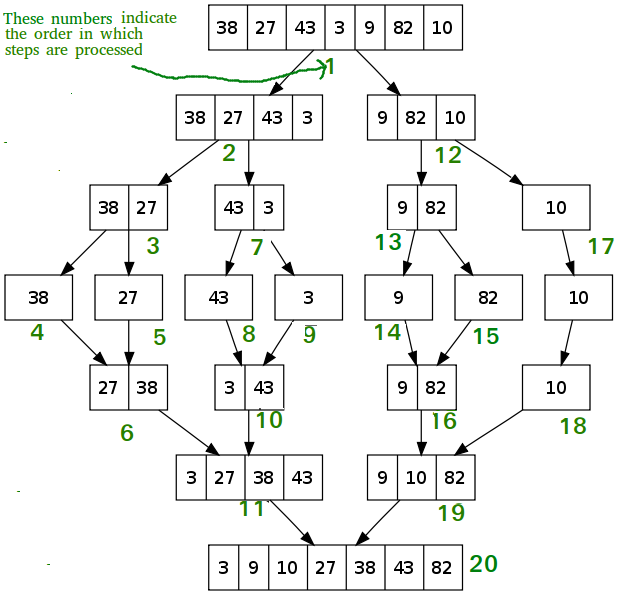

In [9]:
#Merge Sort
#https://www.geeksforgeeks.org/merge-sort/
#Like QuickSort, Merge Sort is a Divide and Conquer algorithm. It divides input array in two halves, calls itself for the two halves and then merges the two sorted halves. The merge() function is used for merging two halves. The merge(arr, l, m, r) is key process that assumes that arr[l..m] and arr[m+1..r] are sorted and merges the two sorted sub-arrays into one. See following C implementation for details.

from IPython.display import Image, display
display(Image(filename='/Users/vincentpun/Downloads/Merge-Sort-Tutorial.png'))

In [10]:
#https://www.geeksforgeeks.org/merge-sort/

# Python program for implementation of  
# MergeSort (Alternative) 
  
def merge_sort(values): 
  
    if len(values)>1: 
        m = len(values)//2
        left = values[:m] 
        right = values[m:] 
        left = merge_sort(left) 
        right = merge_sort(right) 
  
        values =[] 
  
        while len(left)>0 and len(right)>0: 
            if left[0]<right[0]: 
                values.append(left[0]) 
                left.pop(0) 
            else: 
                values.append(right[0]) 
                right.pop(0) 
  
        for i in left: 
            values.append(i) 
        for i in right: 
            values.append(i) 
                  
    return values 
   
  
# Input list 
a = [12, 11, 13, 5, 6, 7] 
print("Given array is") 
print(*a) 
  
a = merge_sort(a) 
  
# Print output 
print("Sorted array is : ") 
print(*a) 
  
# This code is contributed by Marco Lam 

testmergesort = merge_sort(list1.copy())
testmergesort[0:10]

Given array is
12 11 13 5 6 7
Sorted array is : 
5 6 7 11 12 13


['aawqmtiqwaqbanoegtwqnimviwkbxazjusjvdgghfotnxzpbjt',
 'abhbssuktdmzvacgarddfxvumzduxovpewlhmkdbhjpbqcpalv',
 'abvcgxkubxlplbmceidyccwndteqhytjuhlyxypaotnxssiwnp',
 'adwyoabwvrvfposwlvsgwhpwhckwmrcmcgeecdyyrtdsdoistt',
 'aejmztgqextcdukooijexhszzindbrrzcejnyiykptyrzyixod',
 'afqmuvxcnujevxyemkpucldwotdzugxwxcpiifkwrrrfafwbon',
 'afxzbyqzppycxwkuabjewylbovqdafjeadssbuaddnqpfkdapr',
 'aisyxiuxwknkbofhkesvdkplsqvivbtenutwvtwofqqjhwwncf',
 'alceojufovwopgwmpbxeoawzzjehdncehwwhfjjeoebxjliaav',
 'aqomjrddgyilnhmsyqxojlhmmbmebaxqfzonepfjfakopwqbhh']

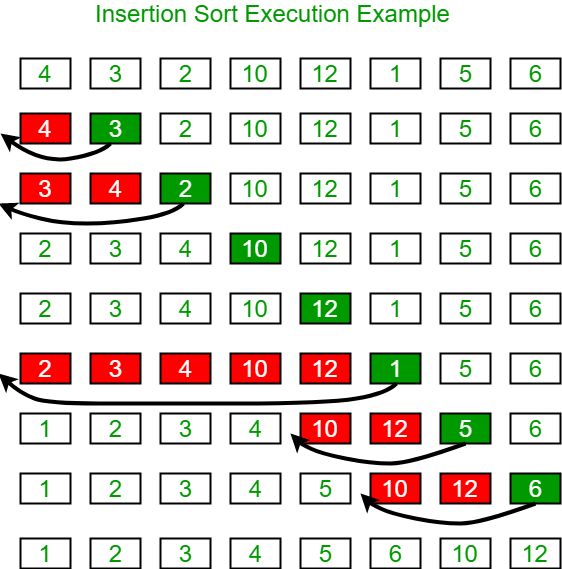

In [11]:
#Insertion Sort
#https://www.geeksforgeeks.org/insertion-sort/

#Insertion sort is a simple sorting algorithm that works similar to the way you sort playing cards in your hands. The array is virtually split into a sorted and an unsorted part. Values from the unsorted part are picked and placed at the correct position in the sorted part.

#Algorithm
#To sort an array of size n in ascending order:
#1: Iterate from arr[1] to arr[n] over the array.
#2: Compare the current element (key) to its predecessor.
#3: If the key element is smaller than its predecessor, compare it to the elements before. Move the greater elements one position up to make space for the swapped element.

display(Image(filename='/Users/vincentpun/Downloads/insertionsort.png'))

In [12]:
#https://stackoverflow.com/questions/46630598/python-insertion-sort-strings

fruits = ['grape', 'banana', 'strawberry', 'apple', 'peach', 'cherry']

def insertionsort(fruits):
    for i in range(len(fruits)):

        tmp = fruits[i]
        j = i-1 # stop index
        while (j > -1 and fruits[j] > tmp):
            fruits[j:j+2] = tmp,fruits[j] #swap places
            j -= 1
    return fruits
    

In [13]:
insertionsort(fruits)

['apple', 'banana', 'cherry', 'grape', 'peach', 'strawberry']

In [14]:
testinsertionsort = insertionsort(list1.copy())
testinsertionsort[0:10]

['aawqmtiqwaqbanoegtwqnimviwkbxazjusjvdgghfotnxzpbjt',
 'abhbssuktdmzvacgarddfxvumzduxovpewlhmkdbhjpbqcpalv',
 'abvcgxkubxlplbmceidyccwndteqhytjuhlyxypaotnxssiwnp',
 'adwyoabwvrvfposwlvsgwhpwhckwmrcmcgeecdyyrtdsdoistt',
 'aejmztgqextcdukooijexhszzindbrrzcejnyiykptyrzyixod',
 'afqmuvxcnujevxyemkpucldwotdzugxwxcpiifkwrrrfafwbon',
 'afxzbyqzppycxwkuabjewylbovqdafjeadssbuaddnqpfkdapr',
 'aisyxiuxwknkbofhkesvdkplsqvivbtenutwvtwofqqjhwwncf',
 'alceojufovwopgwmpbxeoawzzjehdncehwwhfjjeoebxjliaav',
 'aqomjrddgyilnhmsyqxojlhmmbmebaxqfzonepfjfakopwqbhh']

NOTE: Remember to use an unsorted copy of the list each time.  Some functions alter the original list and don't return a copy.  For instance, take a look at pancake sort

***Execution Times***

1. quicksort()
2. merge_sort()
3. insertionsort()

In [15]:
copy1 = [list1.copy(), list2.copy(), list3.copy(), list4.copy(), list5.copy()]
copy2 = [list1.copy(), list2.copy(), list3.copy(), list4.copy(), list5.copy()]
copy3 = [list1.copy(), list2.copy(), list3.copy(), list4.copy(), list5.copy()]

In [16]:
#1. quicksort()

time1 = []

for items in copy1:

    start=time.time()
    
    quicksortcopy1 = quicksort(items)
    
    end = time.time()
    
    executiontime = 1000*(end-start)

    time1.append(executiontime)

In [24]:
#2. merge_sort()

time2 = []

for items in copy2:

    start=time.time()
    
    merge_sortcopy2 = merge_sort(items)
    
    end = time.time()
    
    executiontime = 1000*(end-start)

    time2.append(executiontime)

In [25]:
#3. insertionsort()

time3 = []

for items in copy3:

    start=time.time()
    
    insertcopy3 = insertionsort(items)
    
    end = time.time()
    
    executiontime = 1000*(end-start)

    time3.append(executiontime)

In [26]:
time1
time2
time3

[0.4749298095703125,
 1.1241436004638672,
 1.9679069519042969,
 3.365039825439453,
 3.6017894744873047]

[1.0180473327636719,
 2.107858657836914,
 2.8688907623291016,
 4.217863082885742,
 5.468130111694336]

[0.03409385681152344,
 0.06818771362304688,
 0.1049041748046875,
 0.1418590545654297,
 0.18477439880371094]

***Dataframe***

5. Create a table containing each algorithm and the timings for each list.  Provide a graph showing how each algorithm scales with size of list (also compare the algorithms themselves).  Discuss your findings with explanations for what you observe.  

In [27]:
n = [200,400,600,800,1000]

In [28]:
df = {'Length':n,
      'Quick Sort':time1,
      'Merge Sort':time2,
      'Insertion Sort':time3,
       }
       
df = pd.DataFrame(data=df)

df

,Length,Quick Sort,Merge Sort,Insertion Sort
0,200,0.474930,1.018047,0.034094
1,400,1.124144,2.107859,0.068188
2,600,1.967907,2.868891,0.104904
3,800,3.365040,4.217863,0.141859
4,1000,3.601789,5.468130,0.184774


([<matplotlib.axis.XTick at 0x7fb192be81f0>,
 <a list of 5 Text major ticklabel objects>)

Text(0, 0.5, 'Execution Time (ms)')

Text(0.5, 0, 'Length')

Text(0.5, 1.0, 'Fig 1: Execution time (ms) by Length')

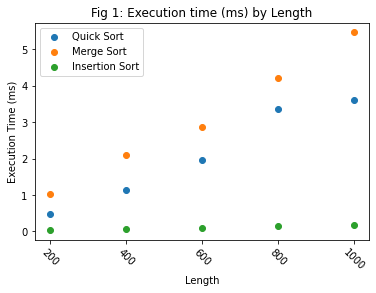

In [29]:
plt.scatter(df['Length'], [df['Quick Sort']])
plt.scatter(df['Length'], [df['Merge Sort']])
plt.scatter(df['Length'], [df['Insertion Sort']])

plt.legend(('Quick Sort',
            'Merge Sort',
            'Insertion Sort'))

plt.xticks(df['Length'], rotation=-45)

plt.ylabel('Execution Time (ms)')

plt.xlabel('Length')

plt.title('Fig 1: Execution time (ms) by Length')

***Executive Summary***

Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

Please make sure that all work on the assignment be completed within Jupyter notebook with separate paragraphs of Python code and text discussions for each part of the assignment.  The executive summary should be at the end and tie everything together.   Submission may be made with the ipython notebook or an html/pdf export.

Program code should conform to best practices in software development, as described in the coding/software development textbook used in the course. 

Continue to utilize Git as you work on software development.

In this assignment, we compare execution times for sorting lists of various sizes (ranging from 200 to 1000 unique strings per list). To sort these lists (5 total), we define three separate functions that are powered by different sorting algorithms. These algorithms are: Quicksort, Mergesort, and Insertion Sort. Understanding the differences between each algorithm is important, as there is often more than one way to arrive at the same solution.<br>
<br>
Both Quicksort and Mergesort are known as "divide and conquer (D&C)" recursive techniques. What this means is that the algorithm takes the items in the lists and breaks it down to the smallest possible scenario ("base case") before sorting anything. After the function has reached the smallest possible scenario (in our example, two strings in the list), it begins executing sorting operations. As we can see in the .PNG images above, both Quicksort and Mergesort require an average of O(n*log(n)) time to execute; this makes sense, as both functions display similar execution times within the visualization. While both functions share the same Big O times, there are small details that can make Quicksort faster than Mergesort; this requires adjustments to areas of the function such as the pivot, which affects how lists are split in each recursive loop. <br>
<br>
The third function that we used was Insertion Sort, and it requires an average of O(n^2) time, which is far slower than Quicksort and Mergesort. One benefit of Insertion Sort is that it is very simple to understand. This function simply takes items from the unsorted part of the list and moves it left to where it should be sorted (think about how one organizes playing cards). <br>
<br>
Understanding the differences between various sorting algorithms is important for data engineers, for there are often multiple ways of solving the same problems. Some methods are easier to interpret than others, so a data engineer may take this into consideration depending on the business problem and audience that he or she will be delivering to. Mergesort and Quicksort may be useful for larger distributed proceses. Insertion Sort may be useful to organize small lists (fruit example above). Depending on the size and complexity of the unsorted data, certain algorithms may be more computationally expensive to operate, so having more than one tool for the job is almost always helpful. 
